In [2]:
from tensorflow.keras.datasets import mnist #케라스(tensorflow >2.0)에서 받을수 있는 데이터 셋
#from tensorflow.keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical #np_utils 모듈 수정됨, 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D #Dropout, Flatten, Conv2D 등 import
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping #모델저장, 과적합 방지

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #데이터 불러오기
#총7만개 자료, 6만개 Train데이터 1만개 Test데이터
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
#28, 28 , 1 --> 28*28픽셀 흑백영상이라 채널이 1 
#0 ~ 255로 분포되어 있는 픽셀값을 0~1사이의 실수값으로 변경하기 위해 255로 나눔
#파이썬에서 / 는 소수점까지 구해진다는 것을 잊으면 안됨 
#정수로 나누고 싶다면 //
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train) #손글씨 결과를 0~9까지 표현하는데 원-핫인코딩 결과로 리턴
Y_test = to_categorical(Y_test) #테스트 결과를 원-핫인코딩함, 이유는 텐서플로우에서 효율적인 계산을 위해서

In [4]:
model = load_model('../tensorflow 1.15/model/09-0.0266.hdf5') # 모델을 새로 불러옴

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))  # 불러온 모델로 테스트 실행

10000/10000 [==============================] - 4s 429us/sample - loss: 0.0266 - accuracy: 0.9915

 Test Accuracy: 0.9915


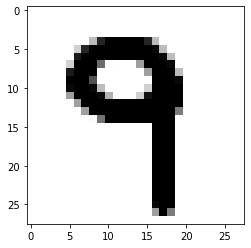

In [26]:
import cv2

img = cv2.imread('./MNIST_9_an.png', cv2.IMREAD_GRAYSCALE)
img2 = 255 - img.copy()
plt.imshow(img2, cmap= 'Greys')
plt.show()

In [27]:
img2.shape

(28, 28)

In [28]:
X_test[0].shape

(28, 28, 1)

In [29]:
img3 = img2.reshape(1, 28, 28, 1) / 255

In [30]:
model.predict_classes(img3)

array([9], dtype=int64)

In [31]:
model.predict(img3)

array([[1.1239030e-11, 3.1975516e-11, 3.6999721e-09, 4.5653982e-05,
        2.0424966e-05, 2.6539434e-08, 9.2438262e-16, 3.1532717e-04,
        6.4452030e-07, 9.9961793e-01]], dtype=float32)

In [24]:
model.predict_on_batch(img3)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.3959090e-06, 8.3693931e-06, 9.3303037e-01, 6.6650055e-02,
        4.3546714e-07, 3.4075715e-06, 5.6426557e-09, 2.1372495e-04,
        7.7781369e-05, 1.4311047e-05]], dtype=float32)>